# Data Preprocessing

---
In this section, we performed the automated data loading from the online dataset and the preprocessing of cleaning the data (removing nonusable entries and columns) and dropping the repeated rows


In [1]:
import numpy as np
import pandas as pd
from scipy.io import arff
import sklearn
from sklearn.feature_selection import SelectKBest, chi2
import time
# request library for downloading the file
import requests
#the output of plotting commands is displayed inline within frontends
%matplotlib inline                                  
import matplotlib.pyplot as plt
from IPython.core.debugger import set_trace         #for debugging 
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import pandas as pd

Preprocess the data of Hepatitis

In [2]:
# We first define a method that is used for shuffle
# Two parameters are contolling the spliting rate, 
# train_valid_percentage: The split proportion of (train+ valid), test. e.g. 200 data points in total. train_valid_percentage: 0.5. (train+ valid): 100, test: 100
# train_percentage: The split proportion of train, valid e.g. 100 data points for train+ valid. train_percentage: 0.8. train: 80, valid: 20
def shuffle(data, label, train_percentage, train_valid_percentage):
  
  # To Shuffle the instances
  indx = np.random.permutation(data.shape[0])       

  # Now we find the exact number of training set and testing set from the percentage
  valid_train_Num = int(train_valid_percentage * data.shape[0])
  trainNum= int(train_percentage* valid_train_Num)


  # split the dataset into train, validate, and test
  # The order is training_data, training_label, validating_data, validating_label, testing_data, testing_label
  return data[indx[:trainNum]], label[indx[:trainNum]], data[indx[trainNum: valid_train_Num]], label[indx[trainNum: valid_train_Num]], data[indx[valid_train_Num:]], label[indx[valid_train_Num:]] 

In [3]:
#load hepatitis dataset and remove all rows with questions marks
#all xxx1 means works related to the first hepatitis dataset
hepatitis_data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/hepatitis/hepatitis.data',header=None)
hepatitis_df = hepatitis_data[~hepatitis_data.eq('?').any(1)] # Remove missing values, cleaning the data
hepatitis_df = hepatitis_df.to_numpy().astype(float)      # Cast the original data into float

This part of the code is to normalize the values 

In [4]:
#print the number of instances, features and classes of dataset 
(N,D), C = hepatitis_df.shape, 2  # we have 2 classes : die and live
print(f'instances (N) \t {N} \n features (D) \t {D} \n classes (C) \t {C}')

hepatitis_x=hepatitis_df[:,1:]   #this is a 2d array consisting of all X attributes of all the instances of the data 
hepatitis_y=hepatitis_df[:,0].astype(int)    # this is a 1d array consisting of all Y attributes ("die"/"live") for all the instances of the data

# Normalize the data to scale them between 0 and 1
for i in range(hepatitis_x.shape[1]):
  hepatitis_x[:,i] = (hepatitis_x[:,i] - hepatitis_x[:,i].min())/(hepatitis_x[:,i].max() - hepatitis_x[:,i].min())   # rescaling the data st all data distributing in [0,1]


selected= SelectKBest(score_func=chi2,k= 4)
x_feature_selected = selected.fit_transform(hepatitis_x,hepatitis_y)
selected.get_support(indices= True)


instances (N) 	 80 
 features (D) 	 20 
 classes (C) 	 2


array([ 1,  5, 11, 18])

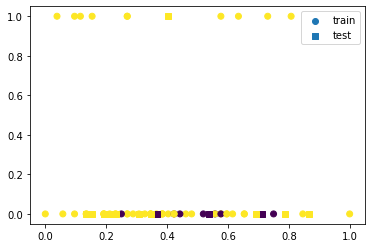

In [ ]:
np.random.seed(2022)
x_train, y_train, x_valid, y_valid, x_test, y_test = shuffle(hepatitis_x, hepatitis_y, 0.85, 0.8)
plt.scatter(x_train[:,0], x_train[:,1], c=y_train, marker='o', label='train')
plt.scatter(x_test[:,0], x_test[:,1], c=y_test, marker='s', label='test')
plt.legend()
plt.show()

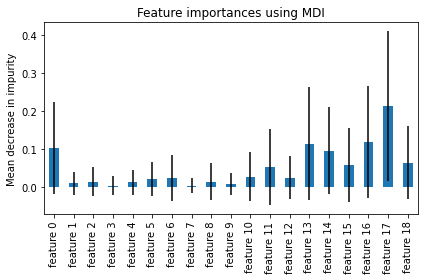

In [ ]:
feature_names = [f"feature {i}" for i in range(hepatitis_x.shape[1])]
forest = RandomForestClassifier(random_state=0)
forest.fit(hepatitis_x, hepatitis_y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
forest_importances = pd.Series(importances, index=feature_names)
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

Preprocess the data of Diabetic Retinopathy Debrecen

In [5]:
#load messidor features dataset and clean data
#all xxx2 means works related to the second messidor features dataset
url= 'https://archive.ics.uci.edu/ml/machine-learning-databases/00329/messidor_features.arff'
response = requests.get(url)
open('data2.arff', "wb").write(response.content)
messidor_data_arff = arff.loadarff('data2.arff')
messidor_df = pd.DataFrame(messidor_data_arff[0])
messidor_df= messidor_df[~messidor_df.eq('?').any(1)]         #I comment this because no "?" in this dataset, do we need this line?
#Since columns 8-15 and columns 2-7 are based on the same data, so we keep the normalized ones and remove columns 2-7 
#messidor_df = messidor_df.drop(messidor_df.columns[2:8], axis=1) #######??
messidor_df = messidor_df.drop(messidor_df.columns[8:16], axis=1)
messidor_df = messidor_df.to_numpy().astype(float)         #the original last col is b'0'/b'1', don't know why convert to float works directly

In [6]:
#print the number of instances, features and classes of dataset 
(N,D), C = messidor_df.shape, 2  # we have 2 classes : die and live
print(f'instances (N) \t {N} \n features (D) \t {D} \n classes (C) \t {C}')

messidor_x=messidor_df[:,:-1]   #this is a 2d array consisting of all X attributes of all the instances of the data 
messidor_y=messidor_df[:,-1].astype(int)    # this is a 1d array consisting of all Y attributes ("die"/"live") for all the instances of the data




# To normalize the features This part is commented for now because it creates negative values that affect the plotting using k-best features
for i in range(messidor_x.shape[1]):
  messidor_x[:,i] = (messidor_x[:,i] - messidor_x[:,i].min())/(messidor_x[:,i].max() - messidor_x[:,i].min())



selected= SelectKBest(chi2, k=4).fit(messidor_x, messidor_y)
selected.get_support(indices= True)

instances (N) 	 1151 
 features (D) 	 12 
 classes (C) 	 2


array([2, 3, 4, 5])

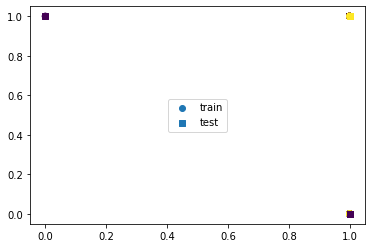

In [ ]:
np.random.seed(2022)
x_train, y_train, x_valid, y_valid, x_test, y_test = shuffle(messidor_x, messidor_y, 0.85, 0.8)
plt.scatter(x_train[:,0], x_train[:,1], c=y_train, marker='o', label='train')
plt.scatter(x_test[:,0], x_test[:,1], c=y_test, marker='s', label='test')
plt.legend(loc= "center")
plt.show()

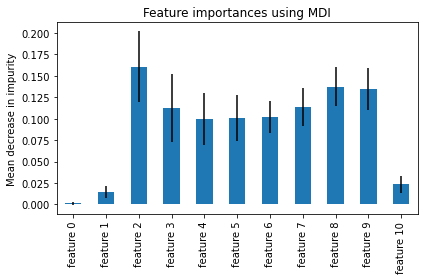

In [ ]:
feature_names = [f"feature {i}" for i in range(messidor_x.shape[1])]
forest = RandomForestClassifier(random_state=0)
forest.fit(messidor_x, messidor_y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
forest_importances = pd.Series(importances, index=feature_names)
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

# Data Visualization

---
'''TODO: High level summary of what we are trying to visualize


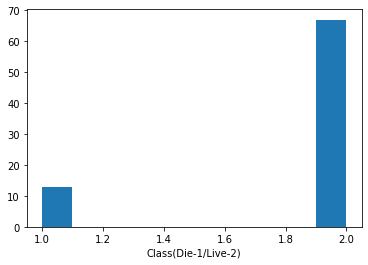

total number of data points is 80
negative class(die) has 13 data points
positive class(live) has 67 data points


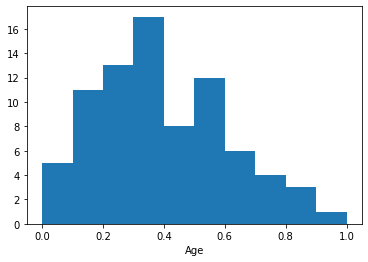

Mean of Age is 0.3973557692307692
Median of Age is 0.3557692307692307
Variance of Age is 0.04646767520340237


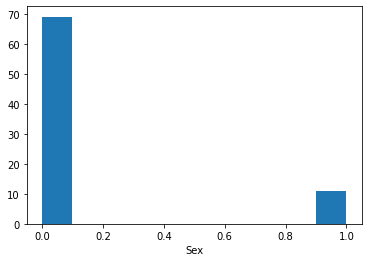

Mean of Sex is 0.1375
Median of Sex is 0.0
Variance of Sex is 0.11859375000000001


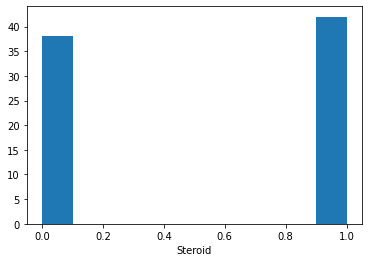

Mean of Steroid is 0.525
Median of Steroid is 1.0
Variance of Steroid is 0.24937499999999999


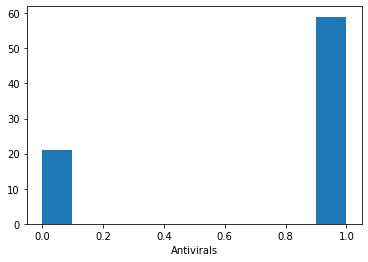

Mean of Antivirals is 0.7375
Median of Antivirals is 1.0
Variance of Antivirals is 0.19359374999999998


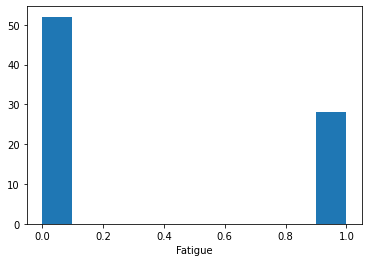

Mean of Fatigue is 0.35
Median of Fatigue is 0.0
Variance of Fatigue is 0.22749999999999998


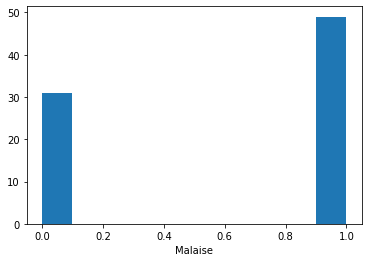

Mean of Malaise is 0.6125
Median of Malaise is 1.0
Variance of Malaise is 0.23734375000000002


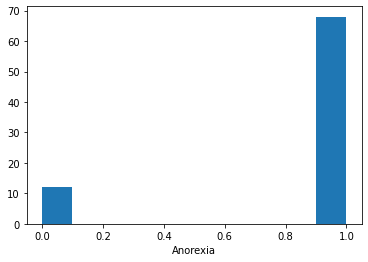

Mean of Anorexia is 0.85
Median of Anorexia is 1.0
Variance of Anorexia is 0.12749999999999997


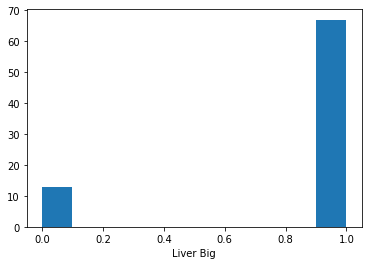

Mean of Liver Big is 0.8375
Median of Liver Big is 1.0
Variance of Liver Big is 0.13609374999999999


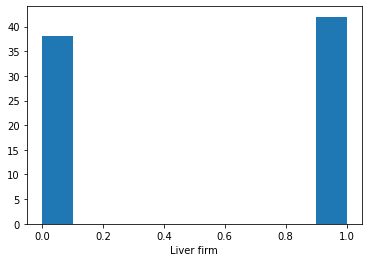

Mean of Liver firm is 0.525
Median of Liver firm is 1.0
Variance of Liver firm is 0.24937499999999996


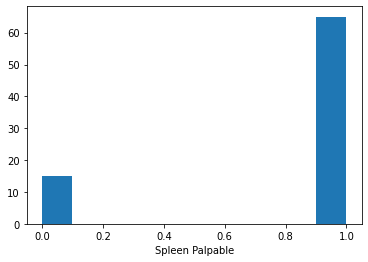

Mean of Spleen Palpable is 0.8125
Median of Spleen Palpable is 1.0
Variance of Spleen Palpable is 0.15234375


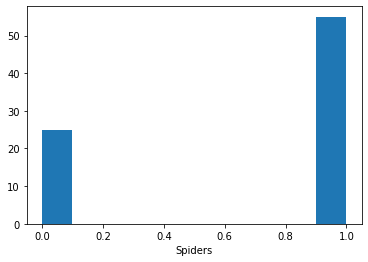

Mean of Spiders is 0.6875
Median of Spiders is 1.0
Variance of Spiders is 0.21484375


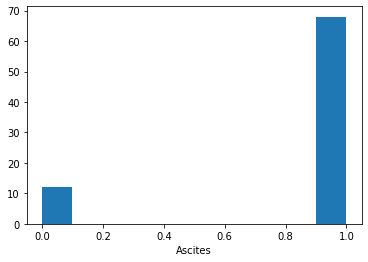

Mean of Ascites is 0.85
Median of Ascites is 1.0
Variance of Ascites is 0.1275


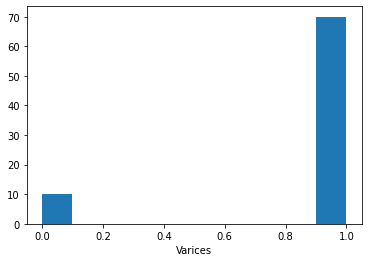

Mean of Varices is 0.875
Median of Varices is 1.0
Variance of Varices is 0.109375


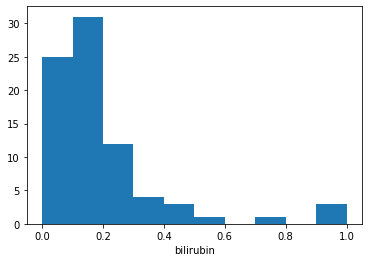

Mean of bilirubin is 0.20472222222222225
Median of bilirubin is 0.15555555555555556
Variance of bilirubin is 0.037354243827160495


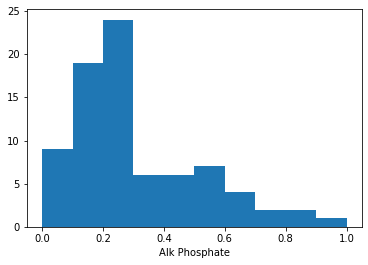

Mean of Alk Phosphate is 0.3028051181102362
Median of Alk Phosphate is 0.23228346456692914
Variance of Alk Phosphate is 0.04411355080522661


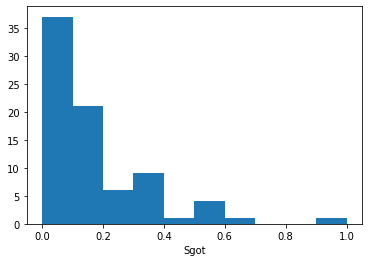

Mean of Sgot is 0.16754926108374385
Median of Sgot is 0.10467980295566504
Variance of Sgot is 0.030712188933242734


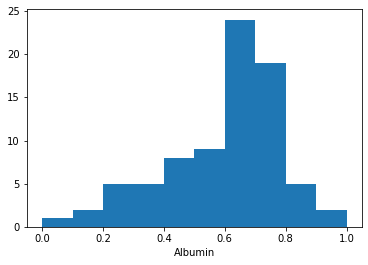

Mean of Albumin is 0.6012931034482759
Median of Albumin is 0.6551724137931034
Variance of Albumin is 0.03899654429250892


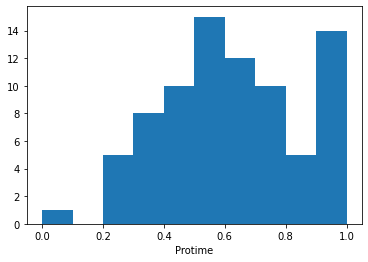

Mean of Protime is 0.6251249999999999
Median of Protime is 0.62
Variance of Protime is 0.054199984374999996


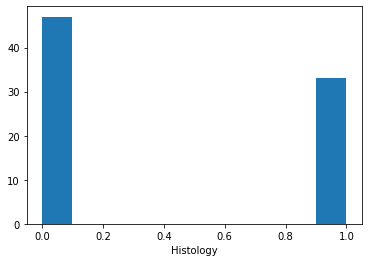

Mean of Histology is 0.4125
Median of Histology is 0.0
Variance of Histology is 0.24234375000000002


In [ ]:
#plot the distributions of each features in hepatitis dataset with both classes
total_num_df1 = len(hepatitis_df)
num_df1_class1 = len(hepatitis_df[hepatitis_df[:,0] == 1])
num_df1_class2 = len(hepatitis_df[hepatitis_df[:,0] == 2])

df1_features = hepatitis_df[:,1:]     #features stars from second row 
df1_class = hepatitis_df[:,0]
#plot a histogram associated with 2 classes
plt.hist(df1_class)
plt.xlabel('Class(Die-1/Live-2)')
plt.show()
print("total number of data points is",total_num_df1)
print("negative class(die) has",num_df1_class1,"data points")
print("positive class(live) has",num_df1_class2,"data points")

#plots of all features with respect to 2 classes(die&live) 
feature_names1 = ['Age','Sex','Steroid','Antivirals','Fatigue','Malaise','Anorexia','Liver Big','Liver firm','Spleen Palpable',
                 'Spiders','Ascites','Varices','bilirubin','Alk Phosphate','Sgot','Albumin','Protime','Histology']
for x in range(19):
  plt.hist(df1_features[:,x])
  plt.xlabel(feature_names1[x])
  plt.show()
  print("Mean of" ,feature_names1[x], "is", np.mean(df1_features[:,x]))
  print("Median of" ,feature_names1[x], "is", np.median(df1_features[:,x]))
  print("Variance of" ,feature_names1[x], "is", np.var(df1_features[:,x]))
#and, the x-axis overlapping problem seems disappear after we add a data type casting, so do we need to stand/norm?

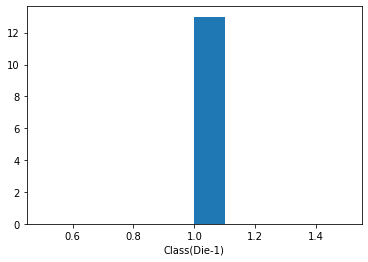

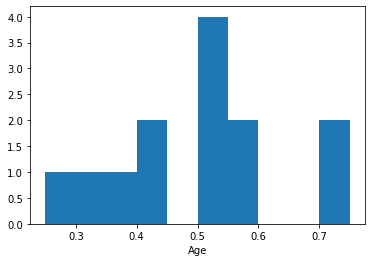

Mean of Age is 0.5014792899408284
Median of Age is 0.5192307692307693
Variance of Age is 0.01789153040859914


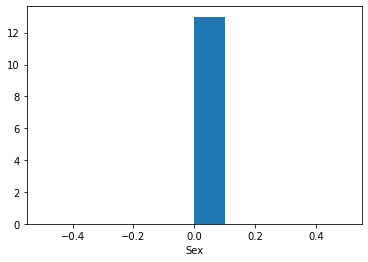

Mean of Sex is 0.0
Median of Sex is 0.0
Variance of Sex is 0.0


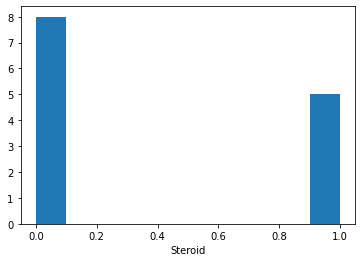

Mean of Steroid is 0.38461538461538464
Median of Steroid is 0.0
Variance of Steroid is 0.23668639053254442


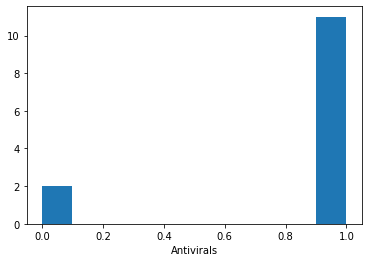

Mean of Antivirals is 0.8461538461538461
Median of Antivirals is 1.0
Variance of Antivirals is 0.13017751479289938


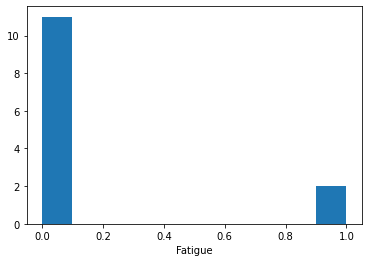

Mean of Fatigue is 0.15384615384615385
Median of Fatigue is 0.0
Variance of Fatigue is 0.13017751479289938


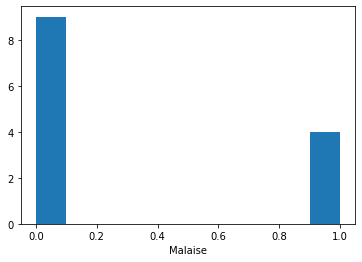

Mean of Malaise is 0.3076923076923077
Median of Malaise is 0.0
Variance of Malaise is 0.21301775147928995


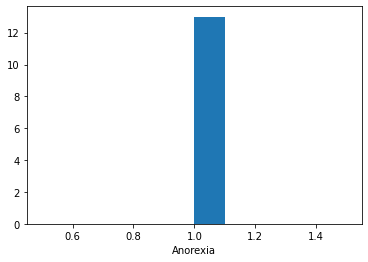

Mean of Anorexia is 1.0
Median of Anorexia is 1.0
Variance of Anorexia is 0.0


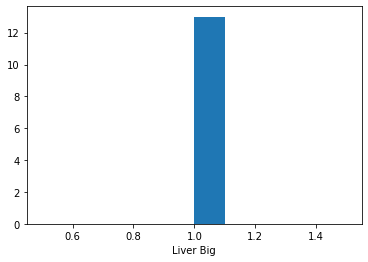

Mean of Liver Big is 1.0
Median of Liver Big is 1.0
Variance of Liver Big is 0.0


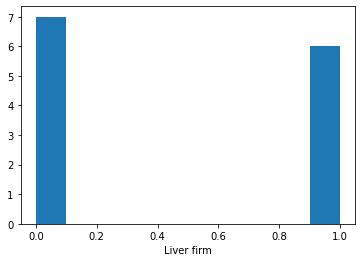

Mean of Liver firm is 0.46153846153846156
Median of Liver firm is 0.0
Variance of Liver firm is 0.24852071005917165


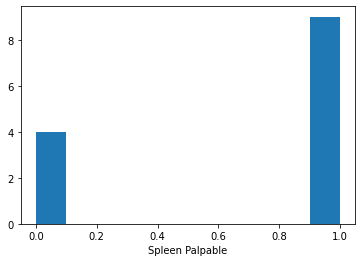

Mean of Spleen Palpable is 0.6923076923076923
Median of Spleen Palpable is 1.0
Variance of Spleen Palpable is 0.21301775147928995


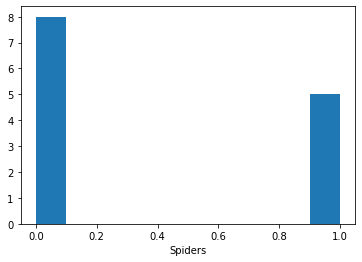

Mean of Spiders is 0.38461538461538464
Median of Spiders is 0.0
Variance of Spiders is 0.23668639053254442


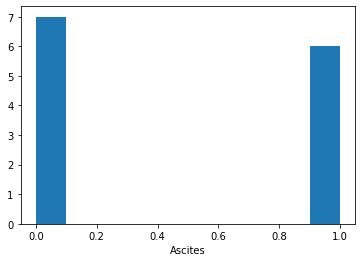

Mean of Ascites is 0.46153846153846156
Median of Ascites is 0.0
Variance of Ascites is 0.24852071005917165


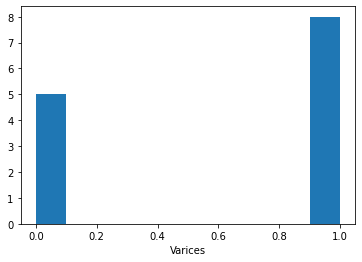

Mean of Varices is 0.6153846153846154
Median of Varices is 1.0
Variance of Varices is 0.23668639053254442


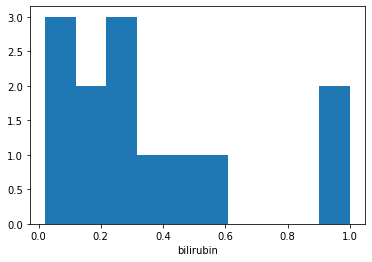

Mean of bilirubin is 0.358974358974359
Median of bilirubin is 0.26666666666666666
Variance of bilirubin is 0.0914602965885017


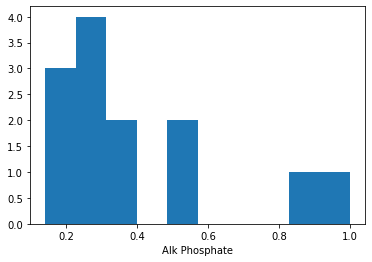

Mean of Alk Phosphate is 0.3930950938824954
Median of Alk Phosphate is 0.29133858267716534
Variance of Alk Phosphate is 0.06669507421855082


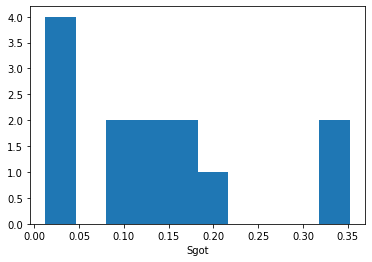

Mean of Sgot is 0.13622584312239486
Median of Sgot is 0.1330049261083744
Variance of Sgot is 0.011956298395780439


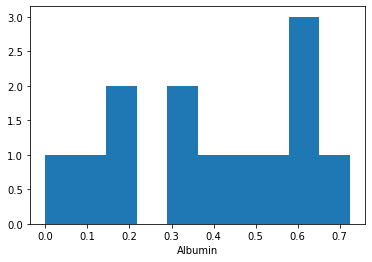

Mean of Albumin is 0.38726790450928383
Median of Albumin is 0.4137931034482758
Variance of Albumin is 0.04429778581429546


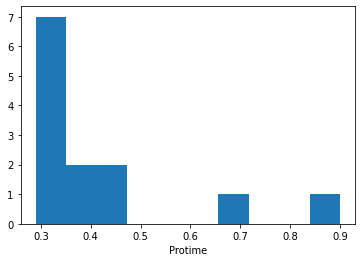

Mean of Protime is 0.4161538461538461
Median of Protime is 0.35
Variance of Protime is 0.0287621301775148


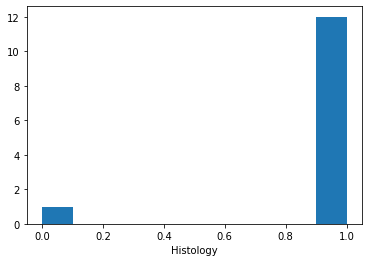

Mean of Histology is 0.9230769230769231
Median of Histology is 1.0
Variance of Histology is 0.07100591715976333


In [ ]:
#plot the distributions of each features in hepatitis dataset with the negative class, which is the "die" class(data=1)
df1_class1 = hepatitis_df[hepatitis_df[:,0] == 1]         #extract the rows of class1
df1_class1_features = df1_class1[:,1:]     
#plot a histogram associated with the negative class
plt.hist(df1_class1[:,0])
plt.xlabel('Class(Die-1)')
plt.show()

#plots of all features with respect to the negative class(die) 
feature_names1 = ['Age','Sex','Steroid','Antivirals','Fatigue','Malaise','Anorexia','Liver Big','Liver firm','Spleen Palpable',
                 'Spiders','Ascites','Varices','bilirubin','Alk Phosphate','Sgot','Albumin','Protime','Histology']
for x in range(19):
  plt.hist(df1_class1_features[:,x])
  plt.xlabel(feature_names1[x])
  plt.show()
  print("Mean of" ,feature_names1[x], "is", np.mean(df1_class1_features[:,x]))
  print("Median of" ,feature_names1[x], "is", np.median(df1_class1_features[:,x]))
  print("Variance of" ,feature_names1[x], "is", np.var(df1_class1_features[:,x]))

#the distributions demonstarte that sex, anorexia, liver big are very helpful for classification and antivirals, fatigue, histology are kind of good,
#but calss1 only have 13 instances so need further examination (i believe, please correct)

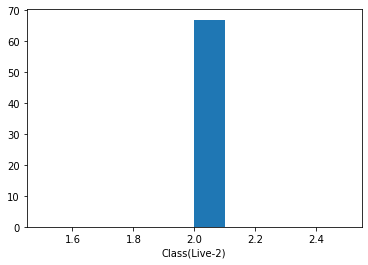

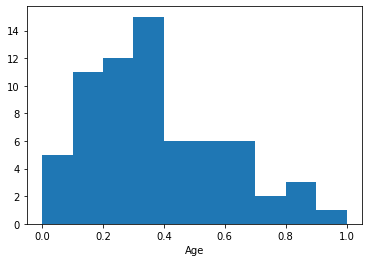

Mean of Age is 0.3771526980482204
Median of Age is 0.34615384615384615
Variance of Age is 0.04950052132695175


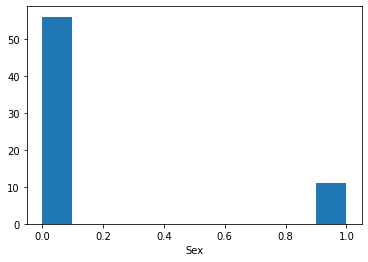

Mean of Sex is 0.16417910447761194
Median of Sex is 0.0
Variance of Sex is 0.1372243261305413


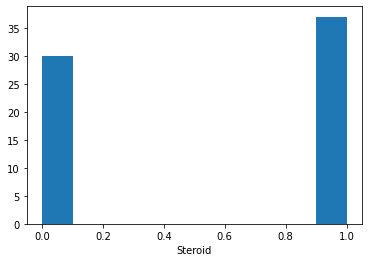

Mean of Steroid is 0.5522388059701493
Median of Steroid is 1.0
Variance of Steroid is 0.24727110715081313


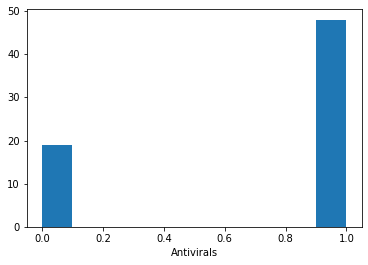

Mean of Antivirals is 0.7164179104477612
Median of Antivirals is 1.0
Variance of Antivirals is 0.20316328803742478


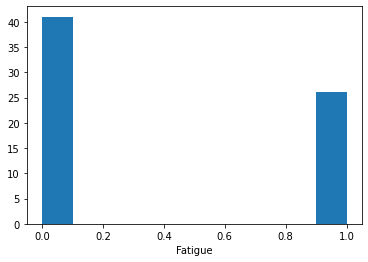

Mean of Fatigue is 0.3880597014925373
Median of Fatigue is 0.0
Variance of Fatigue is 0.23746936957006015


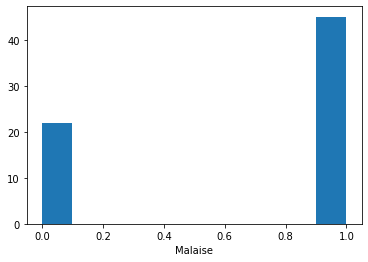

Mean of Malaise is 0.6716417910447762
Median of Malaise is 1.0
Variance of Malaise is 0.22053909556694143


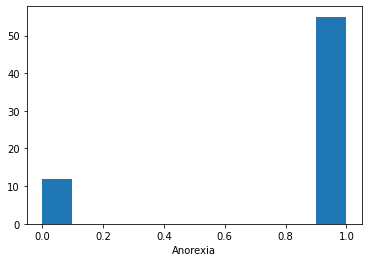

Mean of Anorexia is 0.8208955223880597
Median of Anorexia is 1.0
Variance of Anorexia is 0.14702606371129429


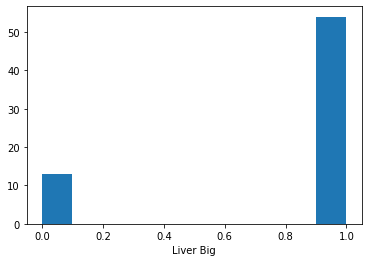

Mean of Liver Big is 0.8059701492537313
Median of Liver Big is 1.0
Variance of Liver Big is 0.15638226776564942


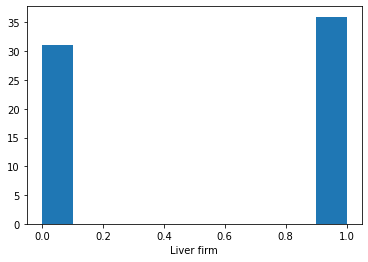

Mean of Liver firm is 0.5373134328358209
Median of Liver firm is 1.0
Variance of Liver firm is 0.2486077077300066


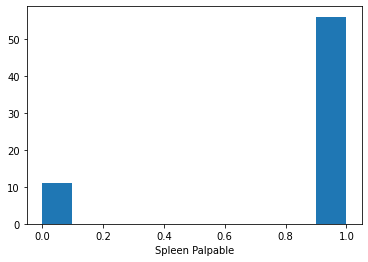

Mean of Spleen Palpable is 0.835820895522388
Median of Spleen Palpable is 1.0
Variance of Spleen Palpable is 0.1372243261305413


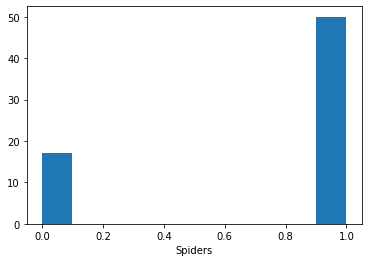

Mean of Spiders is 0.746268656716418
Median of Spiders is 1.0
Variance of Spiders is 0.18935174871909108


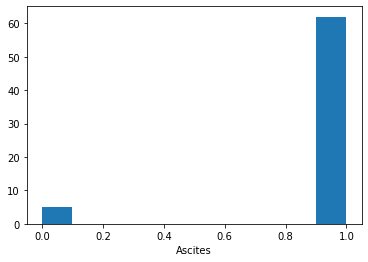

Mean of Ascites is 0.9253731343283582
Median of Ascites is 1.0
Variance of Ascites is 0.06905769659166855


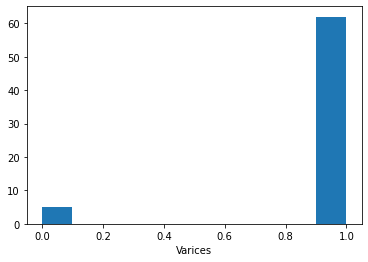

Mean of Varices is 0.9253731343283582
Median of Varices is 1.0
Variance of Varices is 0.06905769659166852


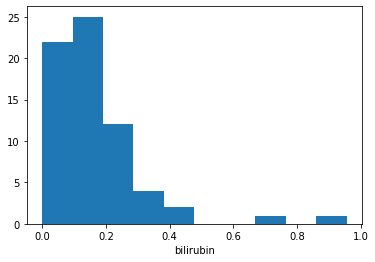

Mean of bilirubin is 0.17479270315091208
Median of bilirubin is 0.15555555555555556
Variance of bilirubin is 0.021343586104854387


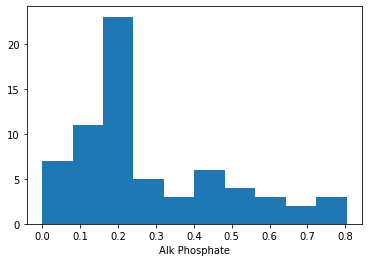

Mean of Alk Phosphate is 0.28528616758726055
Median of Alk Phosphate is 0.23228346456692914
Variance of Alk Phosphate is 0.03784336194201459


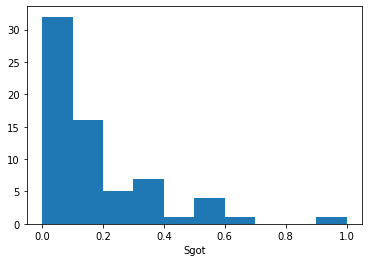

Mean of Sgot is 0.17362693919564737
Median of Sgot is 0.10098522167487685
Variance of Sgot is 0.0341240797518743


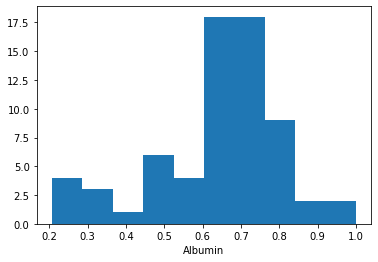

Mean of Albumin is 0.642820380854349
Median of Albumin is 0.6551724137931034
Variance of Albumin is 0.02735554661427631


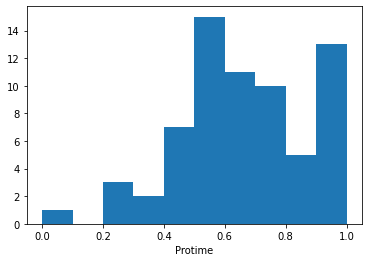

Mean of Protime is 0.6656716417910447
Median of Protime is 0.66
Variance of Protime is 0.04901857874805079


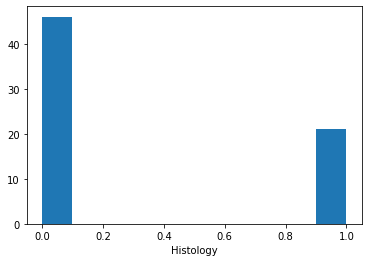

Mean of Histology is 0.31343283582089554
Median of Histology is 0.0
Variance of Histology is 0.2151926932501671


In [ ]:
#plot the distributions of each features in hepatitis dataset with the positive class, which is the "live" class(data=2)
df1_class2 = hepatitis_df[hepatitis_df[:,0] == 2]
df1_class2_features = df1_class2[:,1:]     
#plot a histogram associated with the negative class
plt.hist(df1_class2[:,0])
plt.xlabel('Class(Live-2)')
plt.show()

#plots of all features with respect to the positive class(live) 
feature_names1 = ['Age','Sex','Steroid','Antivirals','Fatigue','Malaise','Anorexia','Liver Big','Liver firm','Spleen Palpable',
                 'Spiders','Ascites','Varices','bilirubin','Alk Phosphate','Sgot','Albumin','Protime','Histology']
for x in range(19):
  plt.hist(df1_class2_features[:,x])
  plt.xlabel(feature_names1[x])
  plt.show()
  print("Mean of" ,feature_names1[x], "is", np.mean(df1_class2_features[:,x]))
  print("Median of" ,feature_names1[x], "is", np.median(df1_class2_features[:,x]))
  print("Variance of" ,feature_names1[x], "is", np.var(df1_class2_features[:,x]))

#anorexia, liver big are still helpful, spiders, ascites, histology, protime may also be helpful
#Liver firm, sex(turns out to be not-related, male >> female), age worst 3 (maybe, please correct me)

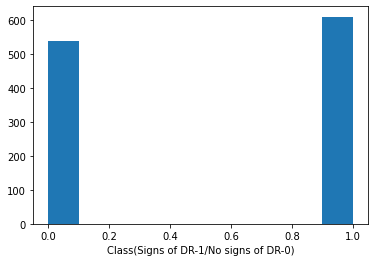

total number of data points is 1151
negative class(contain signs of DR) has 611 data points
positive class(no signs of DR) has 540 data points


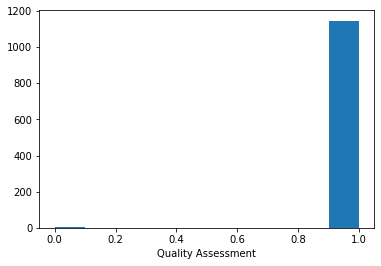

Mean of Quality Assessment is 0.996524761077324
Median of Quality Assessment is 1.0
Variance of Quality Assessment is 0.0034631616371062534


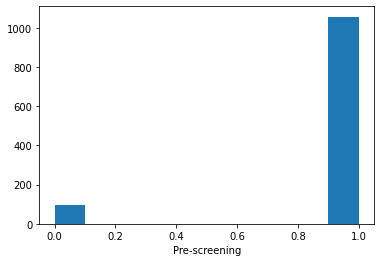

Mean of Pre-screening is 0.9183318853171155
Median of Pre-screening is 1.0
Variance of Pre-screening is 0.07499843372702768


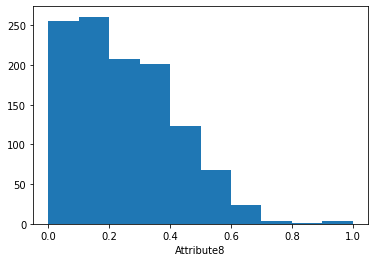

Mean of Attribute8 is 0.24952215464813204
Median of Attribute8 is 0.22666666666666666
Variance of Attribute8 is 0.029149371045999448


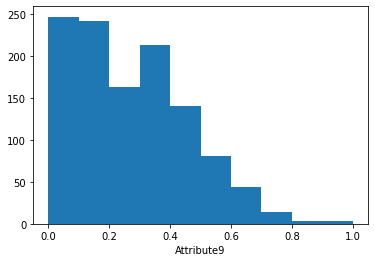

Mean of Attribute9 is 0.27411941822908725
Median of Attribute9 is 0.2595419847328244
Variance of Attribute9 is 0.03383110983590493


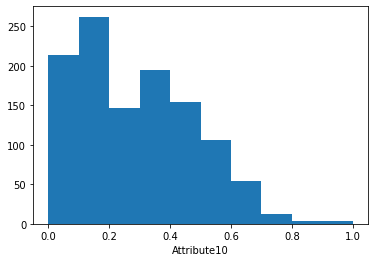

Mean of Attribute10 is 0.28689703509553255
Median of Attribute10 is 0.2605042016806723
Variance of Attribute10 is 0.036694753475004456


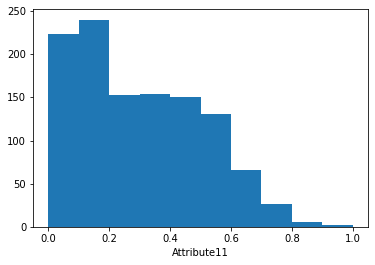

Mean of Attribute11 is 0.30093397046046916
Median of Attribute11 is 0.2692307692307692
Variance of Attribute11 is 0.04118398946075496


In [ ]:
#plot the distributions of each features in Diabetic Retinopathy Debrecen dataset with both classes
total_num_df2 = len(messidor_df)
num_df2_class1 = len(messidor_df[messidor_df[:,-1] == 1])
num_df2_class2 = len(messidor_df[messidor_df[:,-1] == 0])

df2_features = messidor_df[:,:-1]
df2_class = messidor_df[:,-1]
#plot a histogram associated with 2 classes
plt.hist(df2_class)
plt.xlabel('Class(Signs of DR-1/No signs of DR-0)')
plt.show()

print("total number of data points is",total_num_df2)
print("negative class(contain signs of DR) has",num_df2_class1,"data points")
print("positive class(no signs of DR) has",num_df2_class2,"data points")

#plots of all features with respect to 2 classes(sign&no sign)            #confused here, 2-7&8-15 based on same data but not same number of columns?
feature_names2 = ['Quality Assessment','Pre-screening','Attribute8','Attribute9','Attribute10','Attribute11','Attribute12','Attribute13',
                  'Attribute14','Attribute15','Euclidean Distance','Diameter','AM/FM classification']
for x in range(6):
  plt.hist(df2_features[:,x])
  plt.xlabel(feature_names2[x])
  plt.show()
  print("Mean of" ,feature_names2[x], "is", np.mean(df2_features[:,x]))
  print("Median of" ,feature_names2[x], "is", np.median(df2_features[:,x]))
  print("Variance of" ,feature_names2[x], "is", np.var(df2_features[:,x]))

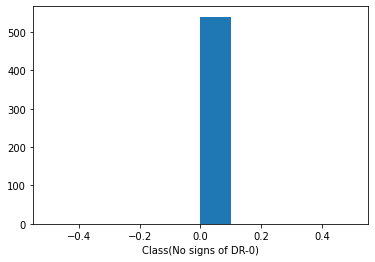

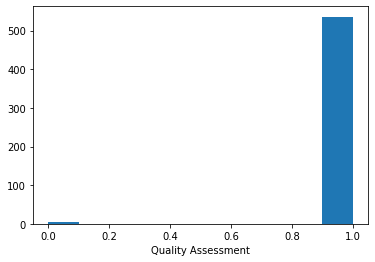

Mean of Quality Assessment is 0.9925925925925926
Median of Quality Assessment is 1.0
Variance of Quality Assessment is 0.007352537722908093


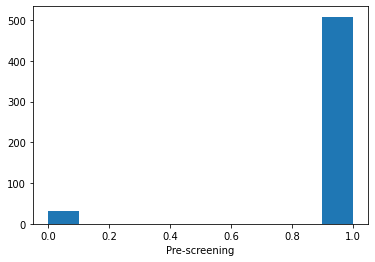

Mean of Pre-screening is 0.9407407407407408
Median of Pre-screening is 1.0
Variance of Pre-screening is 0.05574759945130316


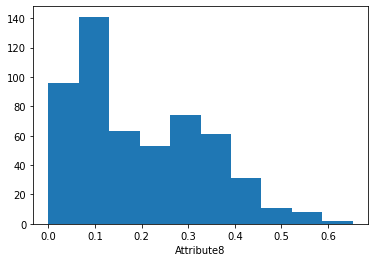

Mean of Attribute8 is 0.1963827160493827
Median of Attribute8 is 0.16
Variance of Attribute8 is 0.019088067520195092


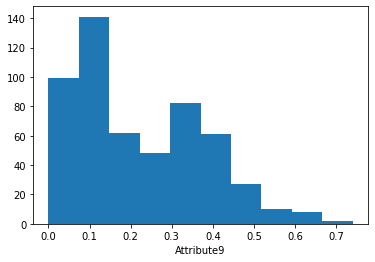

Mean of Attribute9 is 0.22201017811704837
Median of Attribute9 is 0.183206106870229
Variance of Attribute9 is 0.024378840264423857


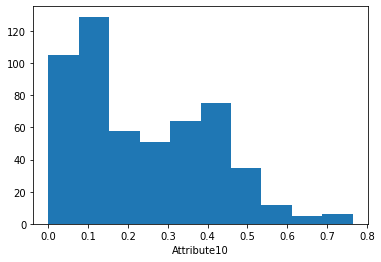

Mean of Attribute10 is 0.23907563025210088
Median of Attribute10 is 0.19327731092436976
Variance of Attribute10 is 0.028711831137683837


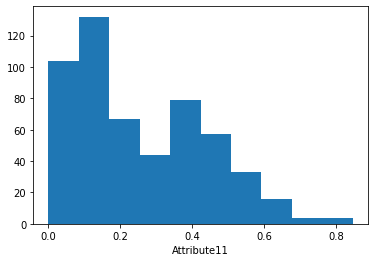

Mean of Attribute11 is 0.2582977207977208
Median of Attribute11 is 0.20192307692307693
Variance of Attribute11 is 0.03445031011314843


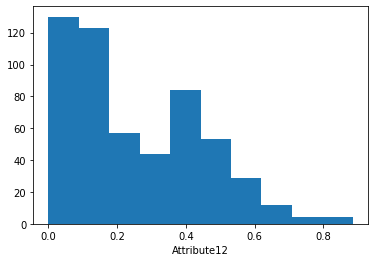

Mean of Attribute12 is 0.2541087962962963
Median of Attribute12 is 0.19791666666666666
Variance of Attribute12 is 0.03633997703939472


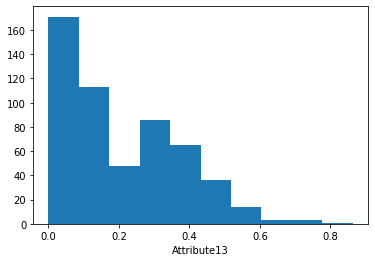

Mean of Attribute13 is 0.20566077441077443
Median of Attribute13 is 0.1590909090909091
Variance of Attribute13 is 0.026199924947426


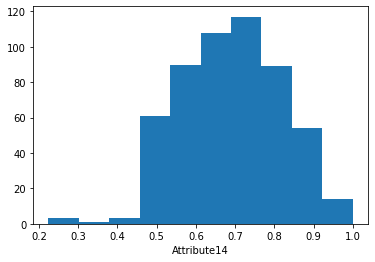

Mean of Attribute14 is 0.6914423744097844
Median of Attribute14 is 0.6925018377848566
Variance of Attribute14 is 0.016104062929486872


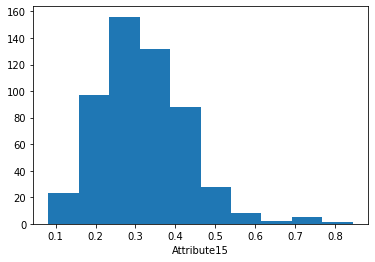

Mean of Attribute15 is 0.3169031008900067
Median of Attribute15 is 0.3068918055960271
Variance of Attribute15 is 0.0118376439892512


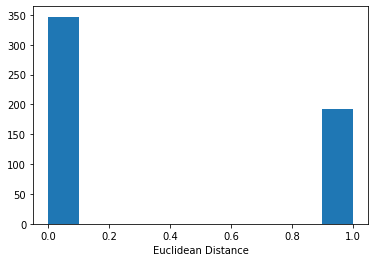

Mean of Euclidean Distance is 0.3574074074074074
Median of Euclidean Distance is 0.0
Variance of Euclidean Distance is 0.2296673525377229


In [ ]:
#plot the distributions of each features in Diabetic Retinopathy Debrecen dataset with the negative class, which is the "no sign" class(data=0)
df2_class1 = messidor_df[messidor_df[:,-1] == 0]        #extract the rows of class1
df2_class1_features = df2_class1[:,:-1]     
#plot a histogram associated with the negative class

plt.hist(df2_class1[:,-1])
plt.xlabel('Class(No signs of DR-0)')
plt.show()

#plots of all features with respect to the negative class(no sign of DR) 
feature_names2 = ['Quality Assessment','Pre-screening','Attribute8','Attribute9','Attribute10','Attribute11','Attribute12','Attribute13',
                  'Attribute14','Attribute15','Euclidean Distance','Diameter','AM/FM classification']
for x in range(11):
  plt.hist(df2_class1_features[:,x])
  plt.xlabel(feature_names2[x])
  plt.show()
  print("Mean of" ,feature_names2[x], "is", np.mean(df2_class1_features[:,x]))
  print("Median of" ,feature_names2[x], "is", np.median(df2_class1_features[:,x]))
  print("Variance of" ,feature_names2[x], "is", np.var(df2_class1_features[:,x]))

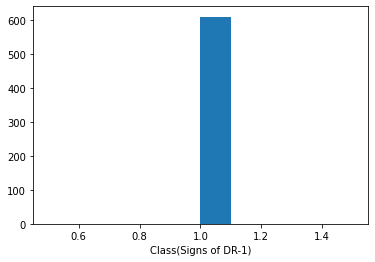

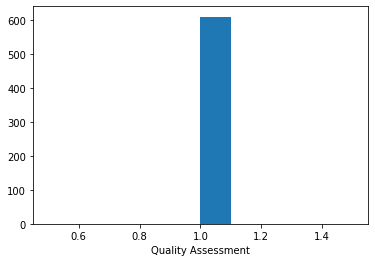

Mean of Quality Assessment is 1.0
Median of Quality Assessment is 1.0
Variance of Quality Assessment is 0.0


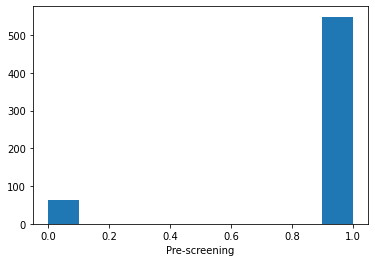

Mean of Pre-screening is 0.8985270049099836
Median of Pre-screening is 1.0
Variance of Pre-screening is 0.09117622635747788


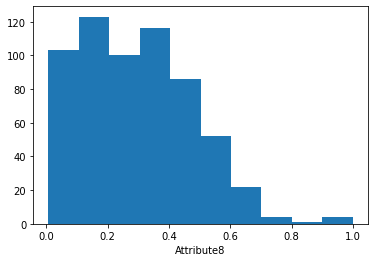

Mean of Attribute8 is 0.2964866339334424
Median of Attribute8 is 0.2866666666666667
Variance of Attribute8 is 0.03334019308375961


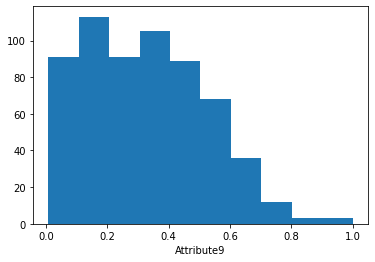

Mean of Attribute9 is 0.32017341112679754
Median of Attribute9 is 0.31297709923664124
Variance of Attribute9 is 0.03766418900103929


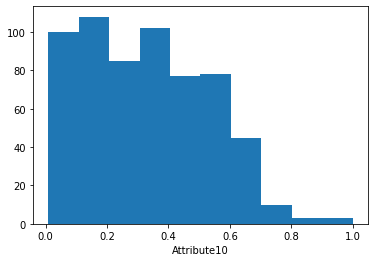

Mean of Attribute10 is 0.32916145181476847
Median of Attribute10 is 0.31932773109243695
Variance of Attribute10 is 0.03994261201609829


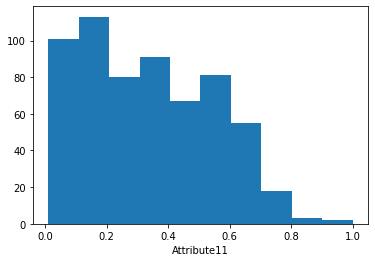

Mean of Attribute11 is 0.33861576230643337
Median of Attribute11 is 0.3173076923076923
Variance of Attribute11 is 0.044108667709209556


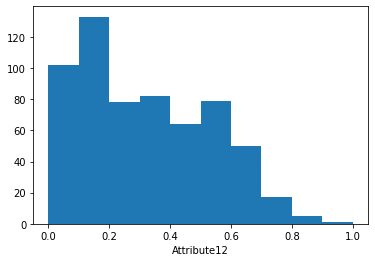

Mean of Attribute12 is 0.31989907255864697
Median of Attribute12 is 0.2916666666666667
Variance of Attribute12 is 0.0435831594808638


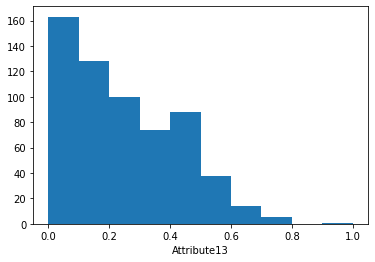

Mean of Attribute13 is 0.2496094331200714
Median of Attribute13 is 0.2159090909090909
Variance of Attribute13 is 0.031367144328919426


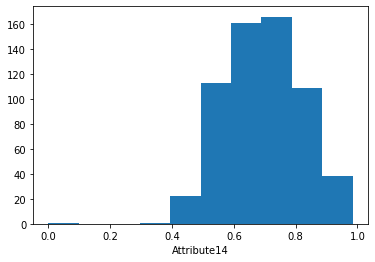

Mean of Attribute14 is 0.693561954267768
Median of Attribute14 is 0.6935109487425097
Variance of Attribute14 is 0.015170737080393144


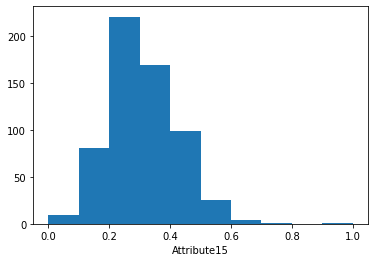

Mean of Attribute15 is 0.31002454459092305
Median of Attribute15 is 0.29616288369613064
Variance of Attribute15 is 0.012813007753545345


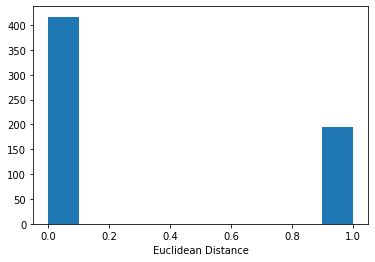

Mean of Euclidean Distance is 0.31751227495908346
Median of Euclidean Distance is 0.0
Variance of Euclidean Distance is 0.21669823020939075


In [ ]:
#plot the distributions of each features in Diabetic Retinopathy Debrecen dataset with the positive class, which is the "contain sign" class(data=1)
df2_class2 = messidor_df[messidor_df[:,-1] == 1]
df2_class2_features = df2_class2[:,:-1]     
#plot a histogram associated with the positive class

plt.hist(df2_class2[:,-1])
plt.xlabel('Class(Signs of DR-1)')
plt.show()

#plots of all features with respect to the posituve class(signs of DR) 
feature_names2 = ['Quality Assessment','Pre-screening','Attribute8','Attribute9','Attribute10','Attribute11','Attribute12','Attribute13',
                  'Attribute14','Attribute15','Euclidean Distance','Diameter','AM/FM classification']
for x in range(11):
  plt.hist(df2_class2_features[:,x])
  plt.xlabel(feature_names2[x])
  plt.show()
  print("Mean of" ,feature_names2[x], "is", np.mean(df2_class2_features[:,x]))
  print("Median of" ,feature_names2[x], "is", np.median(df2_class2_features[:,x]))
  print("Variance of" ,feature_names2[x], "is", np.var(df2_class2_features[:,x]))

# Model Construction

---
In this section, we defined the different metric functions and the skeleton of the models



In [ ]:
def euclidean(x_train, x_test):
  d = 0.0
  for i in range(len(x_train)):
    d += (x_train[i] - x_test[i])**2
  return np.sqrt(d)

def manhattan(x_train, x_test):
  d = 0.0
  for i in range(len(x_train)):
    d += abs(x_train[i] - x_test[i])
  return d

# dists_func: (input, training_data) -> list(similarity or distance scores) 
def dists_func(elt, train_data, distance):
 return [distance(elt, sample) for sample in train_data]



In [ ]:
# Construct the model of KNN
class KNN():

    def __init__(self, k, d_func):
      # Preserve the data attributes
      self.data= None
      self.labels= None
      self.k= k
      self.d_func= d_func

    
    def fit(self, x, y):
      # Simply store the data to complete the training process
      self.data= x
      self.labels= y

    def predict(self, x_val_test):

      t_l = []
      for i in range(len(x_val_test)):
        distances = np.array(dists_func(x_val_test[i], self.data, self.d_func))
        indices =  distances.argsort()[:self.k]
        t_l.append(round(sum([self.labels[i] for i in indices])* 1.0/ len(indices) ))
      return np.array(t_l)
    
    def evaluate_training(self):
      t_l = []
      for i in range(len(self.data)):
        probe= self.data[i]
        distances = np.array(dists_func(self.data[i], self.data, self.d_func))
        indices =  distances.argsort()[1:self.k+ 1] # Exclude itself
        t_l.append(round(sum([self.labels[i] for i in indices])* 1.0/ len(indices) ))
      counter= 0
      for i, j in zip(t_l, self.labels):
        counter+= 1 if i== j else 0
      return counter/ len(self.labels)* 100

In [ ]:
'''
#Weighted KNN
def predict(self,x_test):
  t_l = []
  for i in range(len(x_test)):
    distances = np.array(dists_func(x_test[i], self.data, self.d_func))
    indices = distances.argsort()[:self.k]
    l=[]
    d=[]
    for i in indices:
      l.append(self.labels[i])
      d.append(distances[i])
    sum = 0.0
    inverse = []
    for i in range(len(d)):
      inv = 1/d[i]
      sum += inv
      inverse.append(inv)
    vote = []
    for i in range(len(inverse)):
      vote.append(inverse[i]/sum)

    class_1 = 0.0
    class_2 = 0.0
    for i in range(len(l)):
      if l[i] == 1:
        class_1 += vote[i]
      else:
        class_2 += vote[i]
    if class_1 >= class_2:
      t_l.append(1)
    else:
      t_l.append(2)
  return np.array(t_l)
  
KNN.predict = predict
'''

In [7]:
def evaluation(predict_results, true_labels):
  counter= 0
  for i, j in zip(predict_results, true_labels):
    counter+= 1 if i== j else 0
  return counter/ len(predict_results)* 100

# Train-Validate-Test KNN class

In [ ]:
def knn_loop(raw_data, raw_label, train_percentage, train_valid_percentage, times, d_func):
  np.random.seed(2022)

  # Training accuracy
  arr_non_selected_train= np.zeros(20)
  arr_selected_train= np.zeros(20)

  # Validation accuracy
  arr_selected_valid= np.zeros(20)
  arr_non_selected_valid= np.zeros(20)
  
  # Test accuracy
  arr_selected_test= np.zeros(20)
  arr_non_selected_test= np.zeros(20)

  for _ in range(times):
    # Split the data that is not feature selected
    x_train, y_train, x_valid, y_valid, x_test, y_test = shuffle(raw_data, raw_label, train_percentage, train_valid_percentage)
    # Split the data that is feature selected
    x_feature_selected = SelectKBest(score_func=chi2,k= 4).fit_transform(raw_data, raw_label)
    x_train_selected, y_train_selected, x_valid_selected, y_valid_selected, x_test_selected, y_test_selected = shuffle(x_feature_selected, raw_label, train_percentage, train_valid_percentage)


    for i in range(1, 21):
      # Test on the non feature selected data
      knn1 = KNN(i, d_func)
      knn1.fit(x_train, y_train)
      arr_non_selected_train[i- 1]+= knn1.evaluate_training()
      arr_non_selected_valid[i- 1]+= evaluation(knn1.predict(x_valid), y_valid)
      arr_non_selected_test[i- 1]+= evaluation(knn1.predict(x_test), y_test)
      

      # Test on the feature selected data
      knn2 = KNN(i, d_func)
      knn2.fit(x_train_selected, y_train_selected)
      arr_selected_train[i- 1]+= knn2.evaluate_training()
      arr_selected_valid[i- 1]+= evaluation(knn2.predict(x_valid_selected), y_valid_selected)
      arr_selected_test[i- 1]+= evaluation(knn2.predict(x_test_selected), y_test_selected)
      

  return arr_non_selected_train/ (times* 1.0), arr_selected_train/ (times* 1.0), arr_selected_test/ (times* 1.0), arr_non_selected_test/ (times* 1.0), arr_selected_valid/ (times* 1.0), arr_non_selected_valid/ (times* 1.0)



In [ ]:
def knn_draw(arr_non_selected_train, arr_selected_train, arr_selected_test_accuracy, arr_non_selected_test_accuracy, arr_selected_valid_accuracy, arr_non_selected_valid_accuracy, function_name):
  print('The function we are using right now is {0}'. format(function_name))

  non_selected_k= np.argmax(arr_non_selected_valid_accuracy)
  print('The best K we found on validation (non selected) set is: {0}, The accuracy is: {1}'.format( non_selected_k+1,  arr_non_selected_valid_accuracy[non_selected_k]) )
  print('The accuracy of best K on the test set (non selected):{0}'.format(arr_non_selected_test_accuracy[non_selected_k]))
  

  selected_k= np.argmax(arr_selected_valid_accuracy)
  print('The best K we found on validation (selected) set is: {0}, The accuracy is: {1}'.format( selected_k+ 1,  arr_selected_valid_accuracy[selected_k]) )
  print('The accuracy of best K on the test set (selected):{0}'.format(arr_selected_test_accuracy[selected_k]))

  train_non_selected_k= np.argmax(arr_non_selected_train)
  print('The best K we found on training (non selected) set is: {0}, The accuracy is: {1}'.format( train_non_selected_k+ 1,  arr_non_selected_train[selected_k]) )
  train_selected_k= np.argmax(arr_selected_train)
  print('The best K we found on training (selected) set is: {0}, The accuracy is: {1}'.format( train_selected_k+ 1,  arr_selected_train[selected_k]) )

  plt.plot(arr_selected_train, label= 'feature selected train')
  plt.plot(arr_non_selected_train, label= 'non feature selected train')
  plt.plot(arr_non_selected_valid_accuracy, label= 'non feature selected valid')
  plt.plot(arr_non_selected_test_accuracy, label= 'non feature selected test')
  plt.plot(arr_selected_valid_accuracy, label= 'feature selected valid')
  plt.plot(arr_selected_test_accuracy, label= 'feature selected test')
  plt. xticks(np.arange(len(arr_selected_test_accuracy)), np.arange(1, len(arr_selected_test_accuracy)+1))
  plt.title("Integrated view of the non feature selected and the feature selected performance")
  plt.xlabel("K neigbors")
  plt.ylabel("Accuracy")
  plt.legend()
  plt.show()

In [ ]:
hepatitis_arr_non_selected_train, hepatitis_arr_selected_train, hepatitis_arr_selected_test_accuracy, hepatitis_arr_non_selected_test_accuracy, hepatitis_arr_selected_valid_accuracy, hepatitis_arr_non_selected_valid_accuracy= knn_loop(hepatitis_x, hepatitis_y, 0.9, 0.8, 100, euclidean)

The function we are using right now is euclidean
The best K we found on validation (non selected) set is: 5, The accuracy is: 84.42857142857137
The accuracy of best K on the test set (non selected):84.3125
The best K we found on validation (selected) set is: 10, The accuracy is: 87.14285714285708
The accuracy of best K on the test set (selected):84.6875
The best K we found on training (non selected) set is: 7, The accuracy is: 83.54385964912271
The best K we found on training (selected) set is: 7, The accuracy is: 84.92982456140342


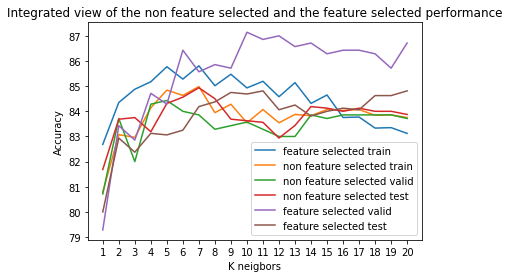

In [ ]:
knn_draw(hepatitis_arr_non_selected_train, hepatitis_arr_selected_train, hepatitis_arr_selected_test_accuracy, hepatitis_arr_non_selected_test_accuracy, hepatitis_arr_selected_valid_accuracy, hepatitis_arr_non_selected_valid_accuracy, 'euclidean')

In [ ]:
hepatitis_arr_non_selected_train, hepatitis_arr_selected_train, hepatitis_arr_selected_test_accuracy, hepatitis_arr_non_selected_test_accuracy, hepatitis_arr_selected_valid_accuracy, hepatitis_arr_non_selected_valid_accuracy= knn_loop(hepatitis_x, hepatitis_y, 0.9, 0.8, 100, manhattan)

The function we are using right now is manhattan
The best K we found on validation (non selected) set is: 4, The accuracy is: 84.5714285714285
The accuracy of best K on the test set (non selected):84.5
The best K we found on validation (selected) set is: 10, The accuracy is: 87.14285714285708
The accuracy of best K on the test set (selected):84.6875
The best K we found on training (non selected) set is: 7, The accuracy is: 83.80701754385954
The best K we found on training (selected) set is: 7, The accuracy is: 84.92982456140342


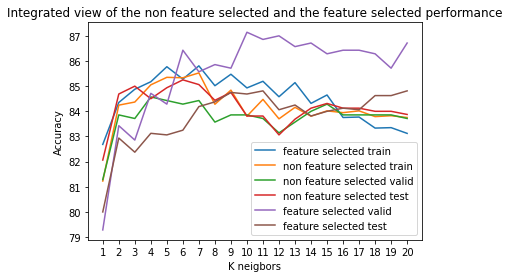

In [ ]:
knn_draw(hepatitis_arr_non_selected_train, hepatitis_arr_selected_train, hepatitis_arr_selected_test_accuracy, hepatitis_arr_non_selected_test_accuracy, hepatitis_arr_selected_valid_accuracy, hepatitis_arr_non_selected_valid_accuracy, 'manhattan')

In [ ]:
messidor_arr_non_selected_train, messidor_arr_selected_train, messidor_arr_selected_test_accuracy, messidor_arr_non_selected_test_accuracy, messidor_arr_selected_valid_accuracy, messidor_arr_non_selected_valid_accuracy= knn_loop(messidor_x, messidor_y, 0.9, 0.8, 2, euclidean)

The function we are using right now is euclidean
The best K we found on validation (non selected) set is: 16, The accuracy is: 70.1086956521739
The accuracy of best K on the test set (non selected):61.688311688311686
The best K we found on validation (selected) set is: 11, The accuracy is: 69.02173913043478
The accuracy of best K on the test set (selected):70.34632034632034
The best K we found on training (non selected) set is: 20, The accuracy is: 61.65458937198068
The best K we found on training (selected) set is: 3, The accuracy is: 68.29710144927537


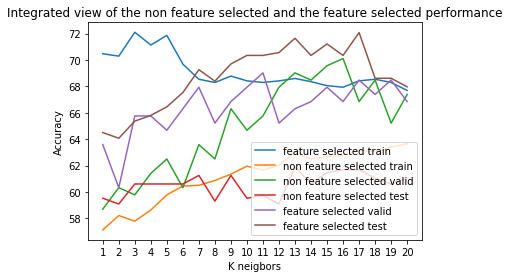

In [ ]:
knn_draw(messidor_arr_non_selected_train, messidor_arr_selected_train, messidor_arr_selected_test_accuracy, messidor_arr_non_selected_test_accuracy, messidor_arr_selected_valid_accuracy, messidor_arr_non_selected_valid_accuracy, 'euclidean')

In [ ]:
messidor_arr_non_selected_train, messidor_arr_selected_train, messidor_arr_selected_test_accuracy, messidor_arr_non_selected_test_accuracy, messidor_arr_selected_valid_accuracy, messidor_arr_non_selected_valid_accuracy= knn_loop(messidor_x, messidor_y, 0.9, 0.8, 2, manhattan)

The function we are using right now is manhattan
The best K we found on validation (non selected) set is: 12, The accuracy is: 70.1086956521739
The accuracy of best K on the test set (non selected):62.55411255411255
The best K we found on validation (selected) set is: 7, The accuracy is: 69.56521739130434
The accuracy of best K on the test set (selected):69.69696969696969
The best K we found on training (non selected) set is: 14, The accuracy is: 63.34541062801932
The best K we found on training (selected) set is: 3, The accuracy is: 67.99516908212561


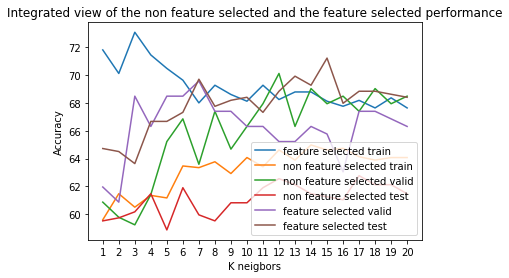

In [ ]:
knn_draw(messidor_arr_non_selected_train, messidor_arr_selected_train, messidor_arr_selected_test_accuracy, messidor_arr_non_selected_test_accuracy, messidor_arr_selected_valid_accuracy, messidor_arr_non_selected_valid_accuracy, 'manhattan')

# Decision Boundary

To draw the decision boundary for the hepatitis data set, we use the meshgrid function in numpy to be able to classify all the points into a rectangular grid. 

In [ ]:
np.random.seed(2022)
trinPercent=0.8

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

def DecisionBound(data,label,startK,endK):
  indx = np.random.permutation(data.shape[0])       
  trainNum= int(trinPercent* data.shape[0])

  # Now we find the exact number of training set and testing set from the percentage

  std_hep_x = StandardScaler().fit_transform(data)

  h_pca=PCA(n_components=2,copy=True)
  h_principal_components = h_pca.fit_transform(std_hep_x)

  std_hepatitis_x_train = h_principal_components[indx[:trainNum]]
  #print('hii', std_hepatitis_x_train.shape[0])
  std_hepatitis_x_test = h_principal_components[indx[trainNum:]]
  #print('hii2', std_hepatitis_x_test.shape[0])
  hepatitis_y_train = label[indx[:trainNum]]
  hepatitis_y_test = label[indx[trainNum:]]
  #we can make the grid finer by increasing the number of samples from 200 to higher value
  x0v = np.linspace(np.min(h_principal_components[:,0]), np.max(h_principal_components[:,0]), 200)
  x1v = np.linspace(np.min(h_principal_components[:,1]), np.max(h_principal_components[:,1]), 200)

  #to features values as a mesh  
  x0, x1 = np.meshgrid(x0v, x1v)
  x_all = np.vstack((x0.ravel(),x1.ravel())).T

  C = int(np.max(hepatitis_y_train))+1
  for k in range(startK,endK):
    y_train_prob = np.zeros((hepatitis_y_train.shape[0], C))
    y_test_prob = np.zeros((hepatitis_y_test.shape[0], C))

    for i in range(hepatitis_y_train.shape[0]):
      if(hepatitis_y_train[i]==1):
        y_train_prob[i,2]=1
      else:
        y_train_prob[i,0]=1

    for i in range(hepatitis_y_test.shape[0]):
      if(hepatitis_y_test[i]==1):
        y_test_prob[i,2]=1
      else:
        y_test_prob[i,0]=1
    model = KNN(k, euclidean)   #using euclidean to draw boundaries
    
    #to get class probability of all the points in the 2D grid
    model.fit(std_hepatitis_x_train, hepatitis_y_train)
    y_prob_all = model.predict(x_all)
    ar = np.zeros((x_all.shape[0],3))
    #print(ar)
    for i in range(x_all.shape[0]):
      if(y_prob_all[i]==1):
        ar[i,2]=1
      else:
        ar[i,0]=1

    y_pred_all = np.zeros_like(y_prob_all)
    #y_pred_all[np.arange(x_all.shape[0]), np.argmax(y_prob_all, axis=-1)] = 1

    plt.scatter(std_hepatitis_x_test[:,0], std_hepatitis_x_test[:,1], c=y_test_prob, marker='x', alpha=1, label='Test data points')
    plt.scatter(std_hepatitis_x_train[:,0], std_hepatitis_x_train[:,1], c=y_train_prob, marker='o', alpha=1, label='Train data points')
    plt.scatter(x_all[:,0], x_all[:,1], c=ar, marker='.', alpha=0.01)
    plt.title(f"with K={k}")
    plt.ylabel('Principle Component 0')
    plt.xlabel('Principle Component 1')
    plt.legend()
    plt.show()
  return

Decision Boundary of KNN (Euclidean, k=11) for the Diabetic Dataset


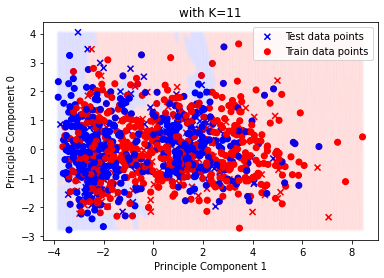

In [ ]:
print("Decision Boundary of KNN (Euclidean, k=11) for the Diabetic Dataset")
DecisionBound(messidor_x,messidor_y+1,11,12)

Decision Boundary of KNN (Euclidean, k=11) for the Hepatitis Dataset


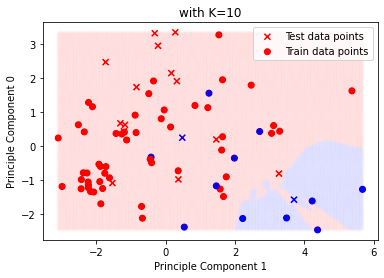

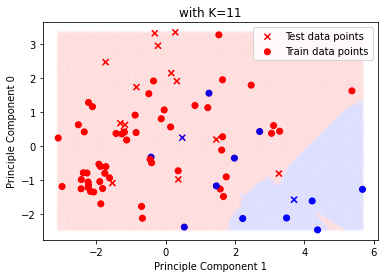

In [ ]:
print("Decision Boundary of KNN (Euclidean, k=10-11) for the Hepatitis Dataset")
DecisionBound(hepatitis_x, hepatitis_y,10,12)

# Decision Tree

In [8]:
def count_label(labels):
  count = 0
  for i in range(len(labels)):
    if labels[i] == 1:
      count += 1
  p1 = count/len(labels)
  p2 = 1-p1
  return p1,p2
def misclassification(labels):
  p1,p2 = count_label(labels)
  return np.min(np.array([p1,p2]))

def entropy(labels):
  p1,p2 = count_label(labels)
  if p1== 0 or p2== 0: # When it is a pure leaf, the entropy should be 0
    return 0
  else:
    return -p1*np.log2(p1)-p2*np.log2(p2)

def gini_index(labels):
  p1,p2 = count_label(labels)
  return 1-p1*p1-p2*p2

In [9]:
class Node():

  def __init__(self, data_indices, parent, data, labels):
    # Define tree fields
    self.left= None
    self.right= None
    self.parent= parent # If it is root, the input parent should be None
    # Define basic fields
    self.data= data # Just pass down all the training data. It would only be a pointer, not taking much space.
    self.labels= labels # The labels
    self.data_indices= data_indices
    if parent:
      self.depth = parent.depth + 1             
    self.threshold= None # The threshold of the Node
    self.feature_index= None # The feature that we are going to perform split on
    self.majority= round(sum(self.labels[self.data_indices])* 1.0/ len(self.data_indices)) #round(sum(self.labels)* 1.0/ len(self.data))  # Get the class of the majority of the data

In [10]:
def greedy_select(node,cost_function):
  min_cost = np.inf
  feature_index_selected = None
  threshold_selected = None
  sorted_data = np.sort(node.data[node.data_indices],axis=0)  #sort along columns
  threshold_candidates = (sorted_data[1:,:]+sorted_data[:-1,:])/2. #maybe there is another way to find potential threshold?

  for i in range(len(node.data[0])): #iterate through features(number of columns)
    for j in range(len(threshold_candidates[:,0])): #number of rows
      left_indices = node.data_indices[node.data[node.data_indices,i] <= threshold_candidates[j,i]]
      right_indices = node.data_indices[node.data[node.data_indices,i] > threshold_candidates[j,i]]
      if len(left_indices) == 0 or len(right_indices) == 0:             
        continue
      left_cost = len(left_indices)*cost_function(node.labels[left_indices])
      right_cost = len(right_indices)*cost_function(node.labels[right_indices])
      total_cost = (left_cost+right_cost)/len(node.data[:,0])           #divide total number of instances here
      if total_cost < min_cost:
        min_cost = total_cost
        feature_index_selected = i
        threshold_selected = threshold_candidates[j,i]
  return min_cost, feature_index_selected, threshold_selected

In [11]:
# Construct the model of DT

class DT():


  def __init__(self, max_depth, cost_fn, min_leaf_instances):
    self.root= None 
    self.max_dep= max_depth
    self.cost_function = cost_fn
    self.min_leaf_data = min_leaf_instances

  def fit_tree(self, node):   
    pass

  def fit(self, data, labels): 
    pass

  def make_prediction(self,elt,node):
    pass

  def predict(self, test_data):
    pass

  

In [12]:
features= []
def fit_tree(self, node):
  if node.depth == self.max_dep or len(node.data_indices) <= self.min_leaf_data:
    return
  total_cost, split_f_index, split_threshold = greedy_select(node, self.cost_function)
  if np.isinf(total_cost):
    return
  #update corresponding attributes
  node.feature_index = split_f_index
  node.threshold = split_threshold
  features.append(split_f_index)
  #find left and right node based on selected feature and threshold
  left_indices = node.data_indices[node.data[node.data_indices,split_f_index] <= split_threshold]
  right_indices = node.data_indices[node.data[node.data_indices,split_f_index] > split_threshold]
  left_node = Node(left_indices,node,node.data,node.labels)
  right_node = Node(right_indices,node,node.data,node.labels)
  #recursively fit the decision tree
  self.fit_tree(left_node)
  self.fit_tree(right_node)
  node.left = left_node
  node.right = right_node

DT.fit_tree = fit_tree

In [13]:
def fit(self,data,labels):
  self.data=data          
  self.labels=labels
  l = [i for i in range(len(data[:,0]))]
  self.root = Node(np.array(l),None,data,labels)
  self.root.depth = 0
  self.fit_tree(self.root)
  return self
  
DT.fit = fit

In [14]:
def make_prediction(self, elt, node):
  if node.left == None and node.right == None:
    return node.majority
  if elt[node.feature_index] <= node.threshold:
    return self.make_prediction(elt, node.left)
  else:
    return self.make_prediction(elt, node.right)
DT.make_prediction = make_prediction

In [15]:
def predict(self, x_val_test):
  predictions = []
  for x in x_val_test:
    predictions.append(self.make_prediction(x,self.root))
    #print(self.make_prediction(x,self.root))
  return np.array(predictions)

DT.predict = predict

In [17]:
def dt_loop_hyper(raw_data, raw_label, train_percentage, train_valid_percentage, seed):
  #np.random.seed(713) # Messidor
  np.random.seed(seed)   # Hepatitis

  # Validation accuracy
  arr_non_selected_valid= np.zeros((20, 5))

  # Test accuracy
  arr_non_selected_test= np.zeros((20, 5))

  # Split the data that is not feature selected
  x_train, y_train, x_valid, y_valid, x_test, y_test = shuffle(raw_data, raw_label, train_percentage, train_valid_percentage)

  func_list= [misclassification, entropy, gini_index]
  for i in range(1, 21):
    # Test on the non feature selected data
    for j in range(1, 6):
      features= [] # Reset the features list
      tree = DT(i, misclassification, j)
      tree= tree.fit(x_train, y_train)
      arr_non_selected_valid[i- 1][j- 1]+= evaluation(tree.predict(x_valid), y_valid)
      arr_non_selected_test[i- 1][j- 1]+= evaluation(tree.predict(x_test), y_test)

  return arr_non_selected_test,  arr_non_selected_valid



In [18]:
# Note this function has been modified several times for drawing purpose
def dt_draw_hyper(arr_non_selected_test_accuracy, arr_non_selected_valid_accuracy):
  plt.plot(arr_non_selected_valid_accuracy[:, 0], label= 'valid min leaf 1')
  plt.plot(arr_non_selected_test_accuracy[:, 0], label= 'test min leaf 1')
  plt.plot(arr_non_selected_valid_accuracy[:, 1], label= 'valid min leaf 2')
  plt.plot(arr_non_selected_test_accuracy[:, 1], label= 'test min leaf 2')
  plt.plot(arr_non_selected_valid_accuracy[:, 2], label= 'valid min leaf 3')
  plt.plot(arr_non_selected_test_accuracy[:, 2], label= 'test min leaf 3')
  plt.plot(arr_non_selected_valid_accuracy[:, 3], label= 'valid min leaf 4')
  plt.plot(arr_non_selected_test_accuracy[:, 3], label= 'test min leaf 4')
  plt.plot(arr_non_selected_valid_accuracy[:, 4], label= 'valid min leaf 5')
  plt.plot(arr_non_selected_test_accuracy[:, 4], label= 'test min leaf 5')
  
  plt. xticks(np.arange(len(arr_non_selected_valid_accuracy[:, 0])), np.arange(1, len(arr_non_selected_valid_accuracy[:, 0])+1))
  plt.xlabel("max_dep")
  plt.ylabel("Accuracy")
  plt.legend(loc= 'upper right')
  plt.show()
  non_selected_k= np.argmax(arr_non_selected_valid_accuracy[:, 0])



In [19]:
def dt_loop_cost(raw_data, raw_label, train_percentage, train_valid_percentage, seed):
  np.random.seed(seed)   

  # Validation accuracy
  arr_non_selected_valid= np.zeros((20, 5))

  # Test accuracy
  arr_non_selected_test= np.zeros((20, 5))

  # Split the data that is not feature selected
  x_train, y_train, x_valid, y_valid, x_test, y_test = shuffle(raw_data, raw_label, train_percentage, train_valid_percentage)

  func_list= [misclassification, entropy, gini_index]
  for i in range(1, 21):
    # Test on the non feature selected data
    for j in range(3):
      features= [] # Reset the features list
      tree = DT(i, func_list[j], 1)
      tree= tree.fit(x_train, y_train)
      arr_non_selected_valid[i- 1][j]+= evaluation(tree.predict(x_valid), y_valid)
      arr_non_selected_test[i- 1][j]+= evaluation(tree.predict(x_test), y_test)

  return arr_non_selected_test,  arr_non_selected_valid


In [20]:
# Note this function has been modified several times for drawing purpose
def dt_draw_cost(arr_non_selected_test_accuracy, arr_non_selected_valid_accuracy):
  plt.plot(arr_non_selected_valid_accuracy[:, 0], label= 'valid misclassification')
  plt.plot(arr_non_selected_test_accuracy[:, 0], label= 'test misclassification')
  plt.plot(arr_non_selected_valid_accuracy[:, 1], label= 'valid entropy')
  plt.plot(arr_non_selected_test_accuracy[:, 1], label= 'test entropy')
  plt.plot(arr_non_selected_valid_accuracy[:, 2], label= 'valid gini index')
  plt.plot(arr_non_selected_test_accuracy[:, 2], label= 'test gini index')

  plt. xticks(np.arange(len(arr_non_selected_valid_accuracy[:, 0])), np.arange(1, len(arr_non_selected_valid_accuracy[:, 0])+1))
  plt.xlabel("max_dep")
  plt.ylabel("Accuracy")
  plt.legend(loc= 'upper right')
  plt.show()
  non_selected_k= np.argmax(arr_non_selected_valid_accuracy[:, 0])


In [21]:
train_array= np.zeros((20, 3))
np.random.seed(713)
func_list= [misclassification, entropy, gini_index]
x_train, y_train, x_valid, y_valid, x_test, y_test = shuffle(messidor_x, messidor_y, 0.7, 0.85)
for i in range(1, 21):
  for j in range(3):
    features= [] # Reset the features list
    tree= DT(i, func_list[j], 1)
    tree= tree.fit(x_train, y_train)
    train_array[i- 1][j]+= evaluation(tree.predict(x_train), y_train)

Best performances on the training set 88.88888888888889 98.9766081871345 100.0


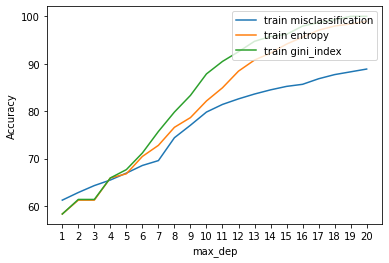

In [22]:
misclass_train_max= np.argmax(train_array[:, 0])
entropy_train_max= np.argmax(train_array[:, 1])
gini_index_train_max= np.argmax(train_array[:, 2])
print("Best performances on the training set", train_array[misclass_train_max, 0], train_array[entropy_train_max, 1], train_array[gini_index_train_max, 2])

plt.plot(train_array[:, 0], label= 'train misclassification')
plt.plot(train_array[:, 1], label= 'train entropy')
plt.plot(train_array[:, 2], label= 'train gini_index')
plt. xticks(np.arange(20), np.arange(1, 20 +1))
plt.xlabel("max_dep")
plt.ylabel("Accuracy")
plt.legend(loc= 'upper right')
plt.show()

In [ ]:
# When run the code, change the random seed to 713 for messidor dataset
messidor_arr_non_selected_test_accuracy, messidor_arr_non_selected_valid_accuracy= dt_loop_hyper(messidor_x, messidor_y, 0.7, 0.85, 713)

In [ ]:
print(messidor_arr_non_selected_valid_accuracy.max())

68.36734693877551


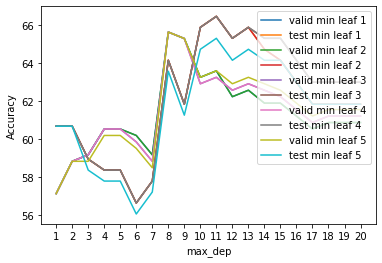

In [ ]:
dt_draw_hyper(messidor_arr_non_selected_test_accuracy, messidor_arr_non_selected_valid_accuracy)

In [ ]:
#Different cost functions on the messidor dataset

In [ ]:
messidor_arr_non_selected_test_accuracy, messidor_arr_non_selected_valid_accuracy= dt_loop_cost(messidor_x, messidor_y, 0.7, 0.85, 713)

In [ ]:
misclass_valid_max= np.argmax(messidor_arr_non_selected_valid_accuracy[:, 0])
entropy_valid_max= np.argmax(messidor_arr_non_selected_valid_accuracy[:, 1])
gini_index_valid_max= np.argmax(messidor_arr_non_selected_valid_accuracy[:, 2])
print(misclass_valid_max, entropy_valid_max, gini_index_valid_max)

7 8 8


In [ ]:
# Find the highest accuracy based on the maximum accuracy of the validation dataset
print(messidor_arr_non_selected_test_accuracy[misclass_valid_max, 0], messidor_arr_non_selected_test_accuracy[entropy_valid_max, 1], messidor_arr_non_selected_test_accuracy[gini_index_valid_max, 2])

64.16184971098265 63.58381502890174 63.005780346820806


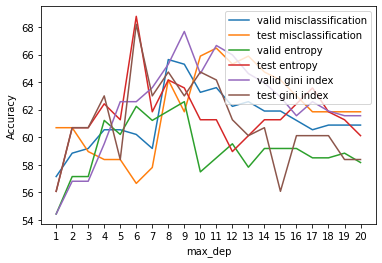

In [ ]:
dt_draw_cost(messidor_arr_non_selected_test_accuracy, messidor_arr_non_selected_valid_accuracy)

Hepatitis

In [ ]:
train_array= np.zeros((20, 3))
np.random.seed(185393)
func_list= [misclassification, entropy, gini_index]
x_train, y_train, x_valid, y_valid, x_test, y_test = shuffle(hepatitis_x, hepatitis_y, 0.7, 0.9)
for i in range(1, 21):
  for j in range(3):
    features= [] # Reset the features list
    tree= DT(i, func_list[j], 1)
    tree= tree.fit(x_train, y_train)
    train_array[i- 1][j]+= evaluation(tree.predict(x_train), y_train)

Best performances on the training set 100.0 100.0 100.0


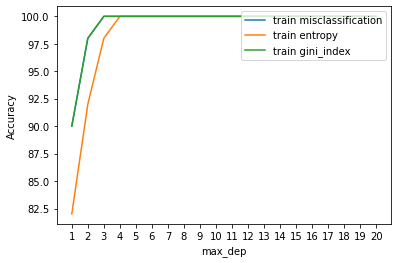

In [ ]:
misclass_train_max= np.argmax(train_array[:, 0])
entropy_train_max= np.argmax(train_array[:, 1])
gini_index_train_max= np.argmax(train_array[:, 2])
print("Best performances on the training set", train_array[misclass_train_max, 0], train_array[entropy_train_max, 1], train_array[gini_index_train_max, 2])

plt.plot(train_array[:, 0], label= 'train misclassification')
plt.plot(train_array[:, 1], label= 'train entropy')
plt.plot(train_array[:, 2], label= 'train gini_index')
plt. xticks(np.arange(20), np.arange(1, 20 +1))
plt.xlabel("max_dep")
plt.ylabel("Accuracy")
plt.legend(loc= 'upper right')
plt.show()

In [ ]:
hepatitis_arr_test_accuracy, hepatitis_arr_valid_accuracy= dt_loop_hyper(hepatitis_x, hepatitis_y, 0.75, 0.7, 185393)

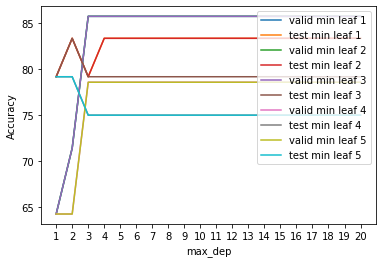

In [ ]:
dt_draw_hyper(hepatitis_arr_test_accuracy, hepatitis_arr_valid_accuracy)

In [ ]:
# When testing different cost functions for the hepatitis dataset, switch the inner for loop to be the cost functions in dt_loop, and set the min_leaf_instances to be 1
hepatitis_arr_test_accuracy, hepatitis_arr_valid_accuracy= dt_loop_cost(hepatitis_x, hepatitis_y, 0.75, 0.7, 185393)

In [ ]:
misclass_valid_max= np.argmax(hepatitis_arr_valid_accuracy[:, 0])
entropy_valid_max= np.argmax(hepatitis_arr_valid_accuracy[:, 1])
gini_index_valid_max= np.argmax(hepatitis_arr_valid_accuracy[:, 2])
print(misclass_valid_max, entropy_valid_max, gini_index_valid_max)

2 0 0


In [ ]:
# Find the highest accuracy based on the maximum accuracy of the validation dataset
print(hepatitis_arr_test_accuracy[misclass_valid_max, 0], hepatitis_arr_test_accuracy[entropy_valid_max, 1], hepatitis_arr_test_accuracy[gini_index_valid_max, 2])

79.16666666666666 83.33333333333334 83.33333333333334


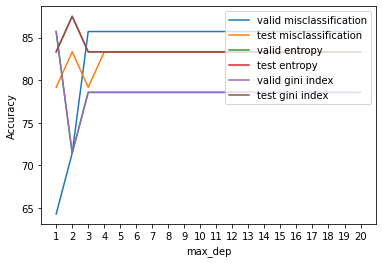

In [ ]:
dt_draw_cost(hepatitis_arr_test_accuracy, hepatitis_arr_valid_accuracy)

Now We try to investigate what features DT used to split the data based on the best hyperparameters we have found

In [24]:
#When running this block plz reload the fit_tree block
features= []  # Reset the features list to empty
np.random.seed(185393)
x_train, y_train, x_valid, y_valid, x_test, y_test = shuffle(hepatitis_x, hepatitis_y, 0.75, 0.7)
tree = DT(3, misclassification, 1)
tree = tree.fit(x_train, y_train)
print(evaluation(tree.predict(x_valid), y_valid), evaluation(tree.predict(x_test), y_test))
features.sort()
print(features)
features= [] # Reset the features list to empty

85.71428571428571 79.16666666666666
[0, 0, 0, 13, 17]


In [25]:
#When running this block plz reload the fit_tree block
features= [] # Reset the features list to empty
np.random.seed(713)
x_train, y_train, x_valid, y_valid, x_test, y_test = shuffle(messidor_x, messidor_y, 0.7, 0.85)
tree = DT(8, misclassification, 1)
tree = tree.fit(x_train, y_train)
print(evaluation(tree.predict(x_valid), y_valid), evaluation(tree.predict(x_test), y_test))
features.sort()
print(features)
features= []

65.64625850340136 64.16184971098265
[1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 5, 5, 5, 5, 5, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9]


# Confusion Matrix for the KNN algorithm

In [ ]:
from tabulate import tabulate

def ConfusionMatrixKNN(data,label,kValue):
  np.random.seed(2022)
  trinPercent=0.8
  indx = np.random.permutation(data.shape[0])
  trainNum= int(trinPercent* data.shape[0])
  data_tr = data[indx[:trainNum]]
  label_tr = label[indx[:trainNum]]
  data_test = data[indx[trainNum:]]
  label_test = label[indx[trainNum:]]
  model = KNN(kValue,euclidean)
  model.fit(data_tr, label_tr)
  label_obtained = model.predict(data_test)
  tp,tn,fp,fn = 0,0,0,0
  for i in range(label_obtained.shape[0]):
    if(label_test[i]==2 and label_obtained[i]==2):
      tp+=1
    elif(label_test[i]==1 and label_obtained[i]==1):
      tn+=1
    elif(label_test[i]==2 and label_obtained[i]==1):
      fp+=1
    elif(label_test[i]==1 and label_obtained[i]==2):
      fn+=1
  
  #create data
  data = [["Actual Negaive", tn, fp], 
          ["Actual Positive", fn, tp]]
    
  #define header names
  col_names = ["Predicted Negative", "Predicted Positive"]
    
  #display table
  print(tabulate(data, headers=col_names, tablefmt="fancy_grid"))

In [ ]:
print("Confusion Matrix of KNN (Euclidean,k=10) for Hepatitis data set ")
ConfusionMatrixKNN(hepatitis_x,hepatitis_y,10)
print("Confusion Matrix of KNN (Euclidean, k=11) for Diabetic data set ")
ConfusionMatrixKNN(messidor_x,messidor_y+1,11)

Confusion Matrix of KNN (Euclidean,k=10) for Hepatitis data set 
╒═════════════════╤══════════════════════╤══════════════════════╕
│                 │   Predicted Negative │   Predicted Positive │
╞═════════════════╪══════════════════════╪══════════════════════╡
│ Actual Negaive  │                    1 │                    1 │
├─────────────────┼──────────────────────┼──────────────────────┤
│ Actual Positive │                    2 │                   12 │
╘═════════════════╧══════════════════════╧══════════════════════╛
Confusion Matrix of KNN (Euclidean, k=11) for Diabetic data set 
╒═════════════════╤══════════════════════╤══════════════════════╕
│                 │   Predicted Negative │   Predicted Positive │
╞═════════════════╪══════════════════════╪══════════════════════╡
│ Actual Negaive  │                   71 │                   56 │
├─────────────────┼──────────────────────┼──────────────────────┤
│ Actual Positive │                   33 │                   71 │
╘═══════════

# Confusion Matrix for the Decision TREE

In [ ]:
from tabulate import tabulate

def ConfusionMatrixDT(data,label,max_depth,min_leaf_len):
  np.random.seed(2022)
  trinPercent=0.8
  indx = np.random.permutation(data.shape[0])
  trainNum= int(trinPercent* data.shape[0])
  data_tr = data[indx[:trainNum]]
  label_tr = label[indx[:trainNum]]
  data_test = data[indx[trainNum:]]
  label_test = label[indx[trainNum:]]
  tree = DT(max_depth, misclassification,min_leaf_len)
  tree = tree.fit(data_tr, label_tr)
  label_obtained = tree.predict(data_test)
  tp,tn,fp,fn = 0,0,0,0
  for i in range(label_obtained.shape[0]):
    if(label_test[i]==2 and label_obtained[i]==2):
      tp+=1
    elif(label_test[i]==1 and label_obtained[i]==1):
      tn+=1
    elif(label_test[i]==2 and label_obtained[i]==1):
      fp+=1
    elif(label_test[i]==1 and label_obtained[i]==2):
      fn+=1
  
  #create data
  data = [["Actual Negaive", tn, fp], 
          ["Actual Positive", fn, tp]]
    
  #define header names
  col_names = ["Predicted Negative", "Predicted Positive"]
    
  #display table
  print(tabulate(data, headers=col_names, tablefmt="fancy_grid"))

In [ ]:
print("Confusion Matrix of Decision Tree (Misclassification,max-depth=3,\n min_leaf=1) for Hepatitis data set ")
ConfusionMatrixDT(hepatitis_x,hepatitis_y,3,1)
print("Confusion Matrix of Decision Tree (Misclassification,max-depth=8,\n min_leaf=1) for Diabetic data set ")
ConfusionMatrixDT(messidor_x,messidor_y+1,11,1)

Confusion Matrix of Decision Tree (Misclassification,max-depth=3,
 min_leaf=1) for Hepatitis data set 
╒═════════════════╤══════════════════════╤══════════════════════╕
│                 │   Predicted Negative │   Predicted Positive │
╞═════════════════╪══════════════════════╪══════════════════════╡
│ Actual Negaive  │                    1 │                    0 │
├─────────────────┼──────────────────────┼──────────────────────┤
│ Actual Positive │                    2 │                   13 │
╘═════════════════╧══════════════════════╧══════════════════════╛
Confusion Matrix of Decision Tree (Misclassification,max-depth=8,
 min_leaf=1) for Diabetic data set 
╒═════════════════╤══════════════════════╤══════════════════════╕
│                 │   Predicted Negative │   Predicted Positive │
╞═════════════════╪══════════════════════╪══════════════════════╡
│ Actual Negaive  │                   43 │                   44 │
├─────────────────┼──────────────────────┼──────────────────────┤
│ A

# Decision tree for Decision Tree

In [ ]:
np.random.seed(2022)
trinPercent=0.8

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

def DecisionBoundDT(data,label,max_depth,min_leaf):
  indx = np.random.permutation(data.shape[0])       
  trainNum= int(trinPercent* data.shape[0])

  # Now we find the exact number of training set and testing set from the percentage

  std_hep_x = StandardScaler().fit_transform(data)

  h_pca=PCA(n_components=2,copy=True)
  h_principal_components = h_pca.fit_transform(std_hep_x)

  std_hepatitis_x_train = h_principal_components[indx[:trainNum]]
  #print('hii', std_hepatitis_x_train.shape[0])
  std_hepatitis_x_test = h_principal_components[indx[trainNum:]]
  #print('hii2', std_hepatitis_x_test.shape[0])
  hepatitis_y_train = label[indx[:trainNum]]
  hepatitis_y_test = label[indx[trainNum:]]
  #we can make the grid finer by increasing the number of samples from 200 to higher value
  x0v = np.linspace(np.min(h_principal_components[:,0]), np.max(h_principal_components[:,0]), 200)
  x1v = np.linspace(np.min(h_principal_components[:,1]), np.max(h_principal_components[:,1]), 200)

  #to features values as a mesh  
  x0, x1 = np.meshgrid(x0v, x1v)
  x_all = np.vstack((x0.ravel(),x1.ravel())).T

  C = int(np.max(hepatitis_y_train))+1
  y_train_prob = np.zeros((hepatitis_y_train.shape[0], C))
  y_test_prob = np.zeros((hepatitis_y_test.shape[0], C))
  for i in range(hepatitis_y_train.shape[0]):
    if(hepatitis_y_train[i]==1):
      y_train_prob[i,2]=1
    else:
      y_train_prob[i,0]=1

  for i in range(hepatitis_y_test.shape[0]):
    if(hepatitis_y_test[i]==1):
      y_test_prob[i,2]=1
    else:
      y_test_prob[i,0]=1
  tree = DT(max_depth, misclassification,min_leaf)
  tree = tree.fit(std_hepatitis_x_train, hepatitis_y_train)
  
  y_prob_all = tree.predict(x_all)
  #to get class probability of all the points in the 2D grid
  ar = np.zeros((x_all.shape[0],3))
  #print(ar)
  for i in range(x_all.shape[0]):
    if(y_prob_all[i]==1):
      ar[i,2]=1
    else:
      ar[i,0]=1

  y_pred_all = np.zeros_like(y_prob_all)
  #y_pred_all[np.arange(x_all.shape[0]), np.argmax(y_prob_all, axis=-1)] = 1

  plt.scatter(std_hepatitis_x_test[:,0], std_hepatitis_x_test[:,1], c=y_test_prob, marker='x', alpha=1, label='Test data points')
  plt.scatter(std_hepatitis_x_train[:,0], std_hepatitis_x_train[:,1], c=y_train_prob, marker='o', alpha=1, label='Train data points')
  plt.scatter(x_all[:,0], x_all[:,1], c=ar, marker='.', alpha=0.01)
  plt.title(f"with max depth={max_depth}, min leaf={min_leaf}")
  plt.ylabel('Principle Component 0')
  plt.xlabel('Principle Component 1')
  plt.legend()
  plt.show()
  return

Decision Boundary of DT (misclassification, max-depth=3,min_leaf=1) for the Hepatitis Dataset


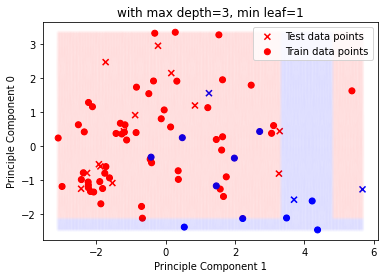

In [ ]:
print("Decision Boundary of DT (misclassification, max-depth=3,min_leaf=1) for the Hepatitis Dataset")
DecisionBoundDT(hepatitis_x, hepatitis_y,3,1)

Decision Boundary of DT (misclassification, max-depth=11,min_leaf=1) for the Diabetic Dataset


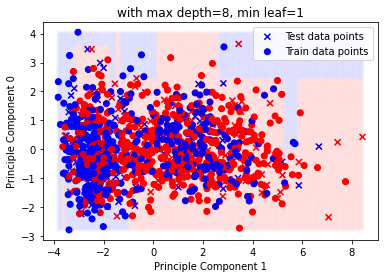

In [ ]:
print("Decision Boundary of DT (misclassification, max-depth=11,min_leaf=1) for the Diabetic Dataset")
DecisionBoundDT(messidor_x,messidor_y+1,8,1)